<h3>Grupo:</h3>
<ol> 
<li>Rafael George</li>
<li>Tales Carvalho</li>
</ol>

# Estratégias de Treinamento - Exercício

## Importar bibliotecas
** Importe pandas, seaborn e as bibliotecas usuais. **

In [78]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [79]:
%matplotlib inline

# Usando o algoritmo PCA para diminuir a dimensionalidade



1.   Gere uma base de dados com make_classification (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.make_classification.html#sklearn.datasets.make_classification)
4.   Faça a separação em treino e teste
5.   Utilize o algoritmo PCA https://scikit-learn.org/stable/modules/generated/sklearn.decomposition.PCA.html?highlight=pca#sklearn.decomposition.PCA e gere mais dois conjuntos de dados com 10 e 5 features, além dos dados originais
6.   Treine modelos de k-NN com os dados originais e os transformados
6.   Analise os resultados


In [80]:
from sklearn.datasets import make_classification

X, y = make_classification(
    n_samples=1000,
    n_features=20,
    n_informative=3,
    n_redundant=0,
    n_repeated=0,
    n_classes=2,
    random_state=0,
    shuffle=False,
)

In [81]:
X.shape

(1000, 20)

In [82]:
y.shape

(1000,)

# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=7)

In [85]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,2.029719,0.405564,0.922924,0.283191,0.923003,1.854879,-0.660768,0.121356,0.098803,0.239814,-0.332145,0.708149,-0.835521,-0.314528,-1.377574,-0.022768,-2.022928,1.422819,0.300763,0.679845
1,1.522577,0.288273,0.554535,-1.481359,0.373581,-0.894291,-0.215805,1.153722,-0.292119,-0.549741,-0.134656,0.486415,-0.957732,-0.979004,0.619988,-0.605335,0.856693,-1.837814,0.532487,-0.954875
2,-0.534224,0.632499,-1.000855,-0.639614,0.312421,0.497213,-1.515882,-2.363216,-0.194596,-0.097668,1.112195,0.244997,-0.205475,0.088390,1.347939,-0.079735,-0.898948,0.669725,1.694089,-0.710733
3,1.280638,0.842917,-1.259912,-1.242395,0.619251,0.148349,0.357298,1.151964,2.126377,-0.987247,-1.421448,0.759179,0.078035,-1.321892,-0.916113,-1.538464,-0.516774,-0.450187,0.218380,0.045420
4,-0.270552,-1.064574,0.904178,0.648505,-0.890496,0.904759,-0.818405,-0.832775,-0.098575,0.727490,-2.340823,-2.065741,0.947385,1.435719,-0.552115,0.201047,2.938667,-0.494055,-0.662635,1.588427
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
695,0.380700,-0.436331,1.342946,0.001435,-0.380233,-0.284753,0.770256,1.324950,-0.281066,1.768012,-0.855502,0.076372,0.754008,-1.095757,0.507958,0.788868,-1.846729,0.389667,1.550000,-1.355637
696,-1.674236,-0.459483,0.947562,0.923534,-0.287811,-1.693627,0.270264,-0.121654,0.900470,-1.206426,0.135862,-0.486623,0.530852,1.134173,-0.987257,0.846237,0.003901,-1.456640,0.301990,-0.189917
697,0.360696,-0.492575,2.222574,0.145026,-1.715291,-0.939967,-0.061406,-1.632222,1.068074,-0.198155,-0.552329,-0.430037,-1.906976,-2.068077,0.913420,-0.592695,0.555539,0.922266,-0.417282,1.709707
698,-0.330250,1.151170,-1.750839,-1.106054,0.053692,-0.025782,0.983813,1.154199,-2.226610,-0.640027,-1.119215,0.440966,1.636091,0.773132,0.774060,-0.598079,0.426239,-0.285900,2.166624,-1.059547


## Utilizando o algoritmo PCA

In [86]:
from sklearn.decomposition import PCA

Com 10 features

In [87]:
pca_10 = PCA(n_components=10)
pca_10

PCA(n_components=10)

In [88]:
pca_10 = pca_10.fit(X_train)


In [89]:
X_pca10_train = pca_10.transform(X_train)
X_pca10_test = pca_10.transform(X_test)

In [90]:
len(X_pca10_train[0])

10

Com 5 features

In [91]:
pca_5 = PCA(n_components=5)
pca_5

PCA(n_components=5)

In [92]:
pca_5 = pca_5.fit(X_train)

In [93]:
X_pca5_train = pca_5.transform(X_train)
X_pca5_test = pca_5.transform(X_test)

In [94]:
len(X_pca5_train[0])

5

## Treinando os modelos com todas as features, com 10 e 5 do PCA

In [95]:
from sklearn.neighbors import KNeighborsClassifier

Todas as features

In [96]:
neigh = KNeighborsClassifier()

In [97]:
neigh.fit(X_train, y_train)

KNeighborsClassifier()

Todas 10 features

In [98]:
neigh10 = KNeighborsClassifier()

In [99]:
neigh10.fit(X_pca10_train, y_train)

KNeighborsClassifier()

Todas 5 features

In [100]:
neigh5 = KNeighborsClassifier()

In [101]:
neigh5.fit(X_pca5_train, y_train)

KNeighborsClassifier()

## Analisando os resultados dos experimentos

In [102]:
from sklearn.metrics import classification_report

Com todas as features

In [103]:
y_all = neigh.predict(X_test)

In [104]:
print(classification_report(y_test, y_all))

              precision    recall  f1-score   support

           0       0.84      0.75      0.79       146
           1       0.78      0.87      0.82       154

    accuracy                           0.81       300
   macro avg       0.81      0.81      0.81       300
weighted avg       0.81      0.81      0.81       300



Com 10 features

In [105]:
y_10 = neigh10.predict(X_pca10_test)
print(classification_report(y_10, y_all))

              precision    recall  f1-score   support

           0       0.74      0.75      0.75       128
           1       0.81      0.81      0.81       172

    accuracy                           0.78       300
   macro avg       0.78      0.78      0.78       300
weighted avg       0.78      0.78      0.78       300



Com 5 features

In [106]:
y_5 = neigh5.predict(X_pca5_test)
print(classification_report(y_5, y_all))

              precision    recall  f1-score   support

           0       0.74      0.73      0.74       131
           1       0.80      0.80      0.80       169

    accuracy                           0.77       300
   macro avg       0.77      0.77      0.77       300
weighted avg       0.77      0.77      0.77       300



### Aplique a validação cruzada para as bases de dados utilizadas neste exercício

Utilize o conjunto de dados gerados a partir do sklearn. Primeira parte dos exercícios.


In [107]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [108]:
#### Dados gerados com a função do sklearn

In [109]:
clf = KNeighborsClassifier(n_neighbors= 7).fit(X_train, y_train)
scores = cross_val_score(clf, X_train, y_train)
scores

array([0.79285714, 0.75714286, 0.83571429, 0.85      , 0.82142857])

In [110]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.81 (+/- 0.07)


Text(0, 0.5, 'Score Rate')

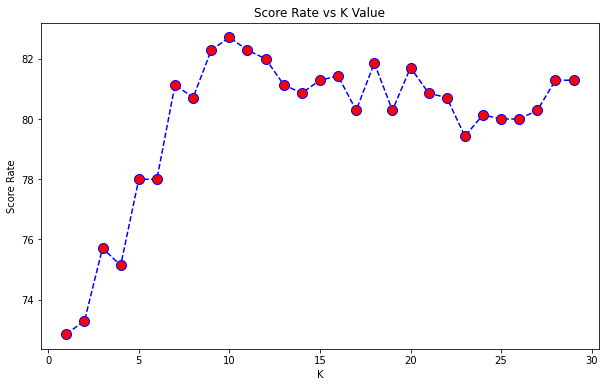

In [111]:
from sklearn.model_selection import cross_val_score

scores = []

for i in range(1,30):
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train, y_train)
  score = cross_val_score(clf, X_train, y_train)
  scores.append(round((score.mean()*100), 2))
  
plt.figure(figsize=(10,6))
plt.plot(range(1,30), scores, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

In [112]:
clf = KNeighborsClassifier(n_neighbors=11).fit(X_train, y_train)
prevision = clf.predict(X_test)
target_names = ['class 0', 'class 1']
print(classification_report(y_test, prevision, target_names=target_names))

              precision    recall  f1-score   support

     class 0       0.84      0.76      0.80       146
     class 1       0.79      0.86      0.83       154

    accuracy                           0.81       300
   macro avg       0.82      0.81      0.81       300
weighted avg       0.82      0.81      0.81       300



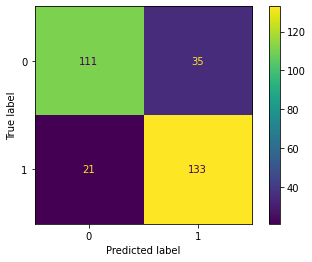

In [113]:
cm = confusion_matrix(y_test, prevision, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()

## Obtenha os dados
** Leia o arquivo csv 'Arvore_Decisao_Iris_Data.csv' em um DataFrame **

In [114]:
df = pd.read_csv('Arvore_Decisao_Iris_Data.csv')

In [115]:
columns = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']

In [116]:
df.columns = columns

In [117]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

Convertendo o target em labels numérica

In [118]:
tradutor = {'Iris-setosa' : 0, 'Iris-versicolor' : 1, 'Iris-virginica' : 2}

In [119]:
df['class'] = df['class'].apply(lambda x: tradutor[x])

In [120]:
df

,sepal_length,sepal_width,petal_length,petal_width,class
0,4.9,3.0,1.4,0.2,0
1,4.7,3.2,1.3,0.2,0
2,4.6,3.1,1.5,0.2,0
3,5.0,3.6,1.4,0.2,0
4,5.4,3.9,1.7,0.4,0
...,...,...,...,...,...
144,6.7,3.0,5.2,2.3,2
145,6.3,2.5,5.0,1.9,2
146,6.5,3.0,5.2,2.0,2
147,6.2,3.4,5.4,2.3,2


In [121]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width,class
count,149.000000,149.000000,149.000000,149.000000,149.000000
mean,5.848322,3.051007,3.774497,1.205369,1.006711
std,0.828594,0.433499,1.759651,0.761292,0.817847
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.400000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149 entries, 0 to 148
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  149 non-null    float64
 1   sepal_width   149 non-null    float64
 2   petal_length  149 non-null    float64
 3   petal_width   149 non-null    float64
 4   class         149 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


# Divisão treino-teste

Use o método train_test_split para dividir seus dados em um conjunto treino e teste.

In [123]:
from sklearn.model_selection import train_test_split

In [124]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns=['class'],axis=1), df['class'], test_size=0.3, random_state=13)

In [125]:
X_train

,sepal_length,sepal_width,petal_length,petal_width
109,6.5,3.2,5.1,2.0
39,5.0,3.5,1.3,0.3
93,5.6,2.7,4.2,1.3
42,5.0,3.5,1.6,0.6
54,5.7,2.8,4.5,1.3
...,...,...,...,...
126,6.1,3.0,4.9,1.8
98,5.7,2.8,4.1,1.3
16,5.1,3.5,1.4,0.3
74,6.6,3.0,4.4,1.4


# Padronize as variáveis

Hora de para padronizar as variáveis.

Import StandardScaler do Scikit-learn.

In [126]:
from sklearn.preprocessing import StandardScaler

In [127]:
scaler = StandardScaler()

Converta as variáveis independentes com o StandardScaler 

In [128]:
scaler = scaler.fit(X_train)

Use o método .transform () para transformar os parâmetros em uma versão padronizada.

In [129]:
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Usando o algoritmo Random Forest como Feature Selection

Importe o RandomForestClassfier e SelectFromModel do scikit learn.

In [130]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_selection import SelectFromModel

from sklearn.metrics import accuracy_score

In [131]:
clf = RandomForestClassifier(n_estimators=150)

In [132]:
clf.fit(X_train_scaled,y_train)

RandomForestClassifier(n_estimators=150)

In [133]:
y_predicted = clf.predict(X_test_scaled)

Analisando a accuracy:

In [134]:
accuracy_score(y_test,y_predicted)

0.9111111111111111

In [135]:
importances = clf.feature_importances_
feature_names = df.columns
forest_importances = pd.Series(importances, index=feature_names[0:4])

[]

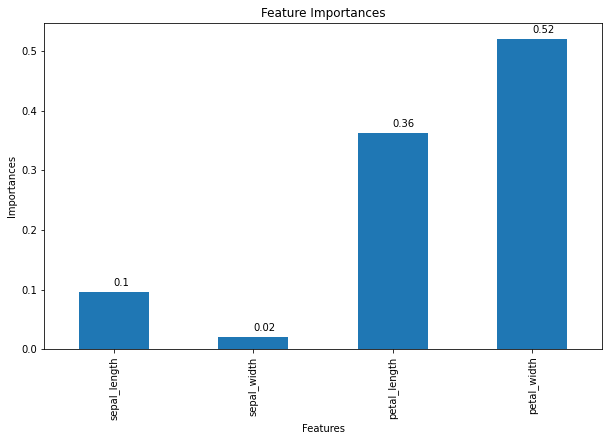

In [136]:
fig, ax = plt.subplots(figsize=(10, 6))
forest_importances.plot.bar()
ax.set_title('Feature Importances')
ax.set_xlabel('Features')
ax.set_ylabel('Importances')
for i, v in enumerate(importances):
    ax.text(i, v + 0.01, str(round(v,2)))
plt.plot()

Referência: https://scikit-learn.org/stable/auto_examples/ensemble/plot_forest_importances.html

## Utilizando e analisando feature selection do modelo Random Forest via SelectFromModel

In [137]:
selector = SelectFromModel(estimator=RandomForestClassifier()).fit(X_train_scaled,y_train)
selector

SelectFromModel(estimator=RandomForestClassifier())

In [138]:
selector.get_support()

array([False, False,  True,  True])

In [139]:
def half_callable(X):
  return round(len(X[0]) / 2)

half_selector = SelectFromModel(estimator=RandomForestClassifier(),
                                 max_features=half_callable)

half_selector.fit(X_train_scaled,y_train).max_features_

2

#### Dados Iris

Ponto extra

In [140]:
scores = cross_val_score(clf, X_train, y_train)
scores

array([0.95238095, 0.95238095, 0.95238095, 1.        , 0.75      ])

In [141]:
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.92 (+/- 0.18)


Text(0, 0.5, 'Score Rate')

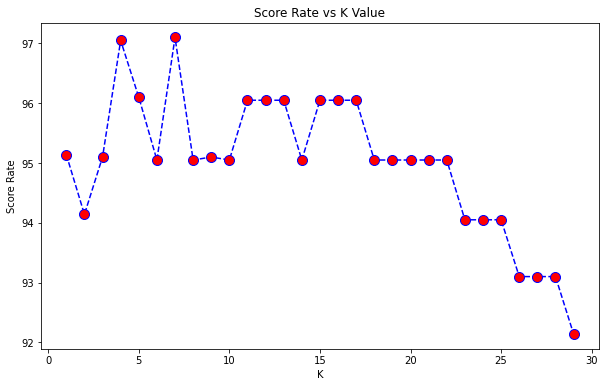

In [142]:
from sklearn.model_selection import cross_val_score

scores = []

for i in range(1,30):
  clf = KNeighborsClassifier(n_neighbors=i).fit(X_train_scaled, y_train)
  score = cross_val_score(clf, X_train, y_train)
  scores.append(round((score.mean()*100), 2))
  
plt.figure(figsize=(10,6))
plt.plot(range(1,30), scores, color='blue', linestyle='dashed', marker='o',
           markerfacecolor = 'red', markersize=10)
plt.title('Score Rate vs K Value')
plt.xlabel('K')
plt.ylabel('Score Rate')

In [143]:
clf = KNeighborsClassifier(n_neighbors= 7).fit(X_train_scaled, y_train)
prevision = clf.predict(X_test_scaled)
target_names = ['class 0', 'class 1', 'class 2']
print(classification_report(y_test, prevision, target_names=target_names))

              precision    recall  f1-score   support

     class 0       1.00      1.00      1.00        14
     class 1       0.73      0.92      0.81        12
     class 2       0.94      0.79      0.86        19

    accuracy                           0.89        45
   macro avg       0.89      0.90      0.89        45
weighted avg       0.90      0.89      0.89        45



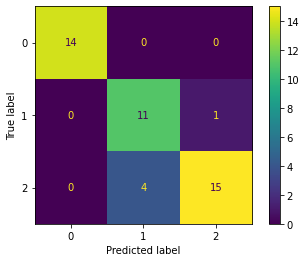

In [144]:
cm = confusion_matrix(y_test, prevision, labels=clf.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                             display_labels=clf.classes_)
disp.plot()
plt.show()